# **### **Import****

In [76]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# **Task1**

In [77]:
csv = pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/food_claims_2212.csv")
csv

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


 Check the data type of each column and adjust as necessary.The data here must be as follows

![image](image.png)


In [78]:
csv.dtypes

claim_id                  int64
time_to_close             int64
claim_amount             object
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object

In [79]:
#
csv['claim_amount'] = csv['claim_amount'].replace("[R$]", "", regex=True).astype(float)
csv['claim_amount']

0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64

In [80]:
#claim_amount must be float64. We converted it from object type to float64 type.
csv.dtypes['claim_amount']

dtype('float64')

In [81]:
#Null check
csv.isnull().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [94]:
csv['time_to_close'].any() < 0

False

In [82]:
median = csv['amount_paid'].median()
csv['amount_paid'] = csv['amount_paid'].fillna(median)

In [83]:
#List location unique data
unique_locations = csv['location'].dropna().unique()
print(unique_locations)

['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']


In [84]:
min_individuals = csv['individuals_on_claim'].dropna().min()
print(min_individuals)

1


In [85]:
unique_linked_cases = pd.unique(csv['linked_cases'].astype(str))
print(unique_linked_cases, csv.dtypes['linked_cases'])

['False' 'True' 'nan'] object


In [86]:
csv['linked_cases'] = csv['linked_cases'].replace({pd.NaT: False, None: False})
unique_linked_cases = csv['linked_cases'].dropna().unique()
print(unique_linked_cases)


[False  True]


In [87]:
csv['cause'] = csv['cause'].str.lower().str.strip().str.replace('meat', 'meat').str.replace('vegetables', 'vegetable')
unique_causes = csv['cause'].dropna().unique()
print(unique_causes)


['unknown' 'meat' 'vegetable']


In [88]:
#Again null check everything is ok
csv.isnull().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

## **Task 1 A:**
- claim_id = ok
- time_to_close = ok
- claim_amount = not ok because float64
- amount_paid = not ok because has missing values
- location = ok
- individuals_on_claim = ok
- linked_cases = not ok has missing values
- cause = not ok hav meat and vegetables

## **Task 1 B:**
- claim_id 0
- time_to_close 0
- claim_amount 0
- amount_paid 36
- location 0
- individuals_on_claim 0
- linked_cases 26
- cause 0

## **Task 1 C:**
- claim_amount = Removed the $R$ symbol and changed the type to float64.
- amount_pain = Missing values were filled with the median of the column.
- linked_cases = Replaced missing values with False.
- cause = Incorrect spellings were replaced with correct ones.

# **Task 2**

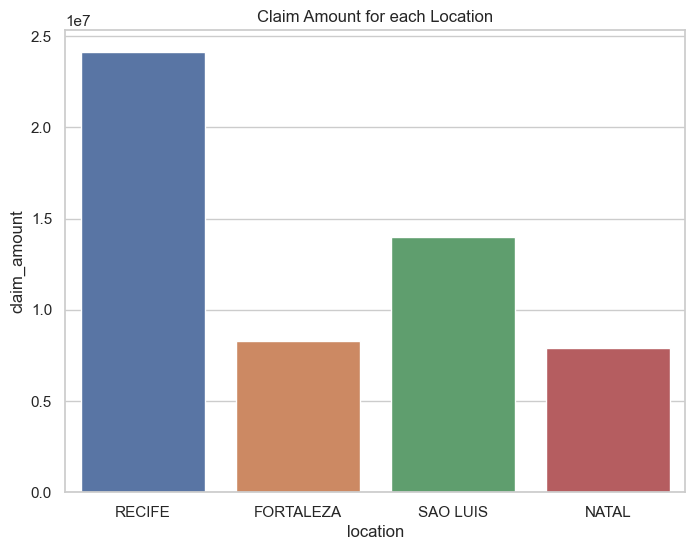

In [89]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='location', y='claim_amount', data=csv, estimator=sum, ci=None, ax=ax)
ax.set_title('Claim Amount for each Location')
plt.show()


- A -> Recife has recorded the highest number of observations.
- B -> The observations lack balance among categories due to RECIFE's nearly double contribution in comparison to the other locations.

# **Task 3**

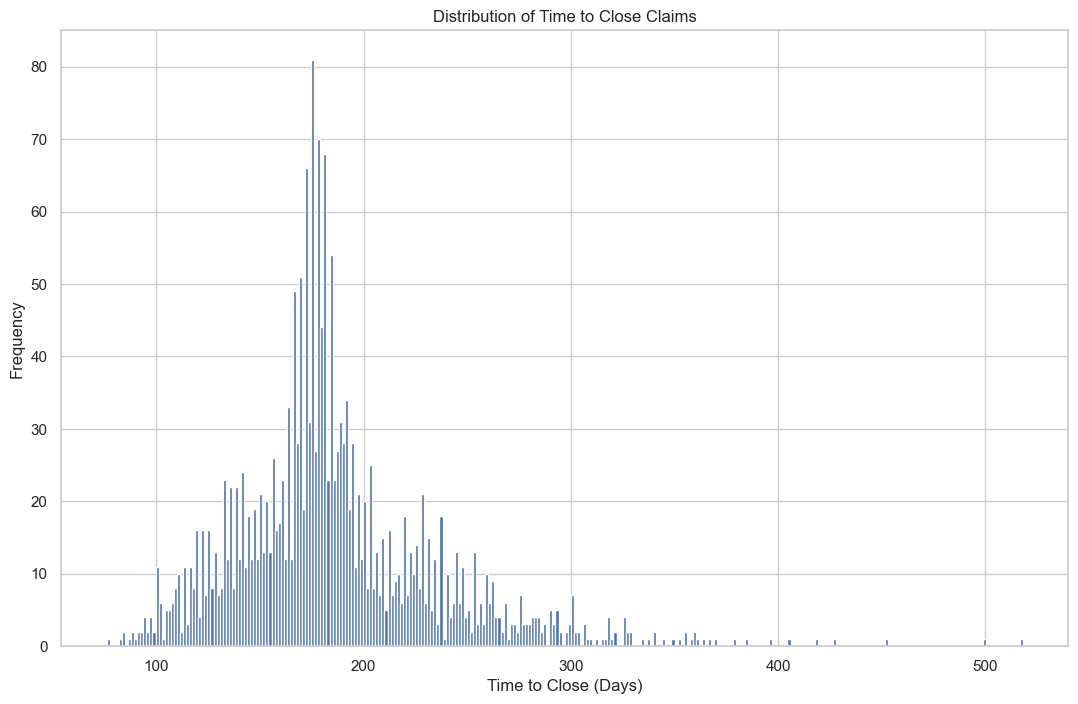

In [90]:
fig, ax = plt.subplots(figsize=(13, 8))
ax.hist(csv['time_to_close'], bins=300)
ax.set_xlabel('Time to Close (Days)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Time to Close Claims')
plt.show()

- On average, it takes between 150 to 200 days for the claim to be resolved and closed.
- There are some claims that take about 400-500 days to close
- The highest number of claims was about 190 days before closure, about 80

# **Task 4**

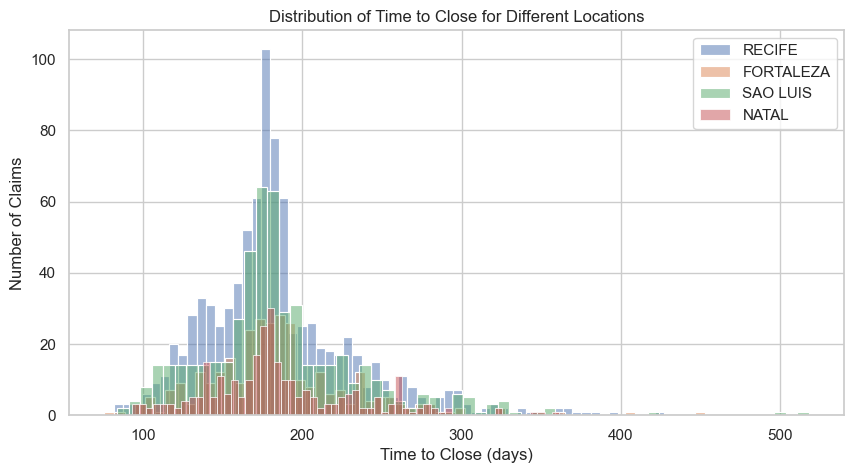

In [91]:
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 5))
locations = ['RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL']
colors = sns.color_palette('deep', n_colors=len(locations))
for i, location in enumerate(locations):
    sns.histplot(csv[csv['location']==location]['time_to_close'], ax=ax, kde=False, bins=60, color=colors[i], alpha=0.5, label=location)
ax.legend()
ax.set_title('Distribution of Time to Close for Different Locations')
ax.set_xlabel('Time to Close (days)')
ax.set_ylabel('Number of Claims')
plt.show()
#Since the data is unbalanced across all locations, there is no relationship between location and time_to_close

In [92]:
corr_coef = csv['location'].replace(['RECIFE', 'SAO LUIS', 'NATAL', 'FORTALEZA'], [1, 2, 3, 4]).corr(csv['time_to_close'])
print(f"The Pearson correlation coefficient between 'loc' and 'time_to_close' is {corr_coef}.")
#There is no relationship

The Pearson correlation coefficient between 'loc' and 'time_to_close' is 0.007306488779072359.
